In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif, RFE

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, auc

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
df = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned_no_weight.csv")

In [3]:
X = df.drop(columns=['Winner'])
y= df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

#oversampling minority class
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
#recursive feature elimination
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=100, step=1)
selector = selector.fit(X_train, y_train)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)




C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [5]:
model_lr = LogisticRegression(
    C=100,
    class_weight=None,
    max_iter=10000,
    penalty='l1',
    solver='liblinear'
)

#evaluating model
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_prob_lr = model_lr.predict_proba(X_test)[:,1]

print('Accuracy: ', accuracy_score(y_test, y_pred_lr))
print('Precision: ', precision_score(y_test, y_pred_lr))
print('Recall: ', recall_score(y_test, y_pred_lr))
print('F1: ', f1_score(y_test, y_pred_lr))
print('ROC AUC:', roc_auc_score(y_test, y_pred_lr))

Accuracy:  0.6579026896343306
Precision:  0.5347137637028014
Recall:  0.36921783010933557
F1:  0.4368159203980099
ROC AUC: 0.5945145754320262


In [6]:
model_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42  # Optional: Ensures reproducibility
)

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_pred_prob_rf = model_rf.predict_proba(X_test)[:,1]

print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print('Precision: ', precision_score(y_test, y_pred_rf))
print('Recall: ', recall_score(y_test, y_pred_rf))
print('F1: ', f1_score(y_test, y_pred_rf))
print('ROC AUC:', roc_auc_score(y_test, y_pred_rf))



Accuracy:  0.6449078271381082
Precision:  0.50764192139738
Recall:  0.39108494533221194
F1:  0.4418052256532066
ROC AUC: 0.589174548137804


In [7]:
model_xgb = xgb.XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=9,
    learning_rate=0.2,
    reg_lambda=1.5,
    gamma=0,
    colsample_bytree=0.9,
    reg_alpha=0,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_prob_xgb = model_xgb.predict_proba(X_test)[:,1]

print('Accuracy: ', accuracy_score(y_test, y_pred_xgb))
print('Precision: ', precision_score(y_test, y_pred_xgb))
print('Recall: ', recall_score(y_test, y_pred_xgb))
print('F1: ', f1_score(y_test, y_pred_xgb))
print('ROC AUC:', roc_auc_score(y_test, y_pred_xgb))


Accuracy:  0.6461166515563614
Precision:  0.5101123595505618
Recall:  0.38183347350714886
F1:  0.4367484367484368
ROC AUC: 0.5880865480743291


In [8]:
train_features = torch.tensor(X_train, dtype=torch.float32)
train_labels = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Adding an extra dimension for the output
test_features = torch.tensor(X_test, dtype=torch.float32)


# Prepare the dataset and dataloader with unique names
train_dataset_unique = TensorDataset(train_features, train_labels)
train_loader_unique = DataLoader(train_dataset_unique, batch_size=64, shuffle=True)

# Define the neural network architecture with unique names
class DeepNet(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.layer4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.layer5 = nn.Linear(32, 16)
        self.bn5 = nn.BatchNorm1d(16)
        self.output_layer = nn.Linear(16, 1)
        self.dropout = nn.Dropout(p=0.5)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.dropout(self.activation(self.bn1(self.layer1(x))))
        x = self.dropout(self.activation(self.bn2(self.layer2(x))))
        x = self.dropout(self.activation(self.bn3(self.layer3(x))))
        x = self.dropout(self.activation(self.bn4(self.layer4(x))))
        x = self.dropout(self.activation(self.bn5(self.layer5(x))))
        x = self.output_activation(self.output_layer(x))
        return x


# Initialize the network, loss function, and optimizer with unique names
input_dim = 100  # Number of features in your dataset
deep_model = DeepNet(input_dim)

loss_function = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer_unique = optim.Adam(deep_model.parameters(), lr=0.001)  # Adam optimizer

# Training loop with unique names
total_epochs = 50  # Adjust the number of epochs as needed
deep_model.train()
for epoch_num in range(total_epochs):
    accumulated_loss = 0.0
    for batch_features, batch_labels in train_loader_unique:
        optimizer_unique.zero_grad()  # Clear the gradients
        batch_outputs = deep_model(batch_features)  # Forward pass
        batch_loss = loss_function(batch_outputs, batch_labels)  # Calculate loss
        batch_loss.backward()  # Backward pass
        optimizer_unique.step()  # Update weights

        accumulated_loss += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss = accumulated_loss / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss:.4f}')

# Evaluating the model on the test set with unique names
deep_model.eval()
with torch.no_grad():
    test_outputs = deep_model(test_features)
    test_predictions = (test_outputs.numpy() > 0.5).astype(int)  # Apply threshold


Epoch 1/50, Loss: 0.7129
Epoch 2/50, Loss: 0.6905
Epoch 3/50, Loss: 0.6806
Epoch 4/50, Loss: 0.6671
Epoch 5/50, Loss: 0.6550
Epoch 6/50, Loss: 0.6420
Epoch 7/50, Loss: 0.6333
Epoch 8/50, Loss: 0.6140
Epoch 9/50, Loss: 0.6098
Epoch 10/50, Loss: 0.6006
Epoch 11/50, Loss: 0.5944
Epoch 12/50, Loss: 0.5803
Epoch 13/50, Loss: 0.5712
Epoch 14/50, Loss: 0.5580
Epoch 15/50, Loss: 0.5626
Epoch 16/50, Loss: 0.5444
Epoch 17/50, Loss: 0.5460
Epoch 18/50, Loss: 0.5411
Epoch 19/50, Loss: 0.5318
Epoch 20/50, Loss: 0.5289
Epoch 21/50, Loss: 0.5231
Epoch 22/50, Loss: 0.5314
Epoch 23/50, Loss: 0.5212
Epoch 24/50, Loss: 0.5195
Epoch 25/50, Loss: 0.5079
Epoch 26/50, Loss: 0.5186
Epoch 27/50, Loss: 0.4960
Epoch 28/50, Loss: 0.5029
Epoch 29/50, Loss: 0.4978
Epoch 30/50, Loss: 0.4997
Epoch 31/50, Loss: 0.4901
Epoch 32/50, Loss: 0.4854
Epoch 33/50, Loss: 0.4913
Epoch 34/50, Loss: 0.4829
Epoch 35/50, Loss: 0.4976
Epoch 36/50, Loss: 0.4875
Epoch 37/50, Loss: 0.4859
Epoch 38/50, Loss: 0.4757
Epoch 39/50, Loss: 0.

In [9]:
#evaluating model
y_pred_deep = test_predictions
y_pred_prob_deep = test_outputs.numpy()

print('Accuracy: ', accuracy_score(y_test, y_pred_deep))
print('Precision: ', precision_score(y_test, y_pred_deep))
print('Recall: ', recall_score(y_test, y_pred_deep))
print('F1: ', f1_score(y_test, y_pred_deep))
print('ROC AUC:', roc_auc_score(y_test, y_pred_deep))


Accuracy:  0.6491387126019945
Precision:  0.5126582278481012
Recall:  0.4768713204373423
F1:  0.49411764705882355
ROC AUC: 0.6113130187092373


In [10]:
#gausian naive bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
y_pred_prob_nb = model_nb.predict_proba(X_test)[:,1]

print('Accuracy: ', accuracy_score(y_test, y_pred_nb))
print('Precision: ', precision_score(y_test, y_pred_nb))
print('Recall: ', recall_score(y_test, y_pred_nb))
print('F1: ', f1_score(y_test, y_pred_nb))
print('ROC AUC:', roc_auc_score(y_test, y_pred_nb))


Accuracy:  0.5367180417044425
Precision:  0.41442786069651744
Recall:  0.7005887300252313
F1:  0.5207877461706784
ROC AUC: 0.5727000253899741


In [11]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier( 
    n_estimators=300,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
y_pred_prob_gb = model_gb.predict_proba(X_test)[:,1]

print('Accuracy: ', accuracy_score(y_test, y_pred_gb))
print('Precision: ', precision_score(y_test, y_pred_gb))
print('Recall: ', recall_score(y_test, y_pred_gb))
print('F1: ', f1_score(y_test, y_pred_gb))
print('ROC AUC:', roc_auc_score(y_test, y_pred_gb))



Accuracy:  0.6310063463281959
Precision:  0.483739837398374
Recall:  0.400336417157275
F1:  0.43810400368154623
ROC AUC: 0.5803568878239205


In [12]:
#vote classifier
from sklearn.ensemble import VotingClassifier

model_vote = VotingClassifier(
    estimators=[
        ('lr', model_lr),
        ('rf', model_rf),
        ('xgb', model_xgb),
        ('nb', model_nb),
        ('gb', model_gb)
    ],
    voting='soft'
)

model_vote.fit(X_train, y_train)
y_pred_vote = model_vote.predict(X_test)
y_pred_prob_vote = model_vote.predict_proba(X_test)[:,1]

print('Accuracy: ', accuracy_score(y_test, y_pred_vote))
print('Precision: ', precision_score(y_test, y_pred_vote))
print('Recall: ', recall_score(y_test, y_pred_vote))
print('F1: ', f1_score(y_test, y_pred_vote))
print('ROC AUC:', roc_auc_score(y_test, y_pred_vote))



Accuracy:  0.638863705046842
Precision:  0.4974958263772955
Recall:  0.5012615643397813
F1:  0.4993715961457897
ROC AUC: 0.608649650094419


Text(0.5, 1.0, 'ROC Curve')

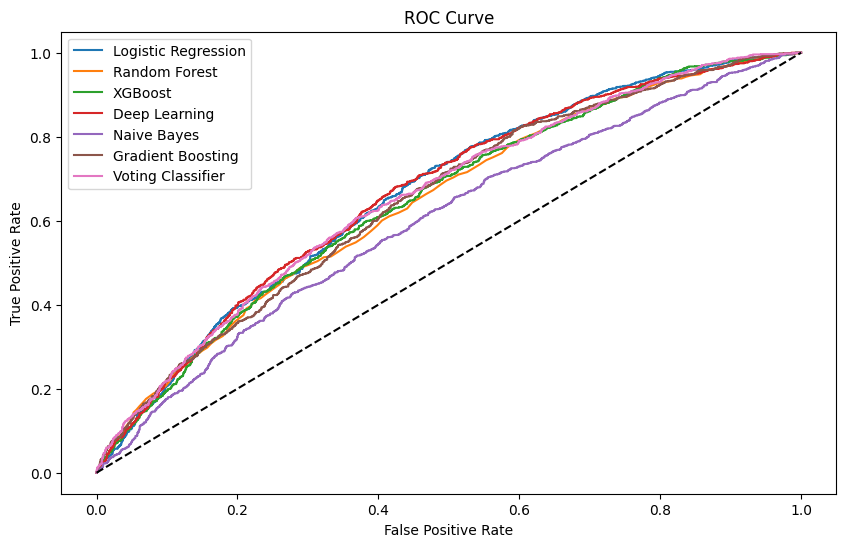

In [13]:
#plotting roc curve
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
fpr_deep, tpr_deep, _ = roc_curve(y_test, y_pred_prob_deep)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_prob_gb)
fpr_vote, tpr_vote, _ = roc_curve(y_test, y_pred_prob_vote)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_deep, tpr_deep, label='Deep Learning')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot(fpr_vote, tpr_vote, label='Voting Classifier')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.title('ROC Curve')
